In [50]:
import os
path = "data/benign"
dir_list = os.listdir(path)

In [51]:
dir_list 

['adenosis.stat.txt',
 'fibroadenoma.stat.txt',
 'phyllodes_tumor.stat.txt',
 'process_db_stat.py',
 'README_B.txt',
 'SOB',
 'tubular_adenoma.stat.txt']

In [55]:
benign_data=[]
for str in dir_list:
    if(str[-3:]=="txt"):
        file=open("data/benign/"+str,"r")
        dict=file.readlines()
        tempd=dict
        for i,ele in enumerate(tempd):
            tempd[i]=ele[:-6]
        for ele in tempd:
            if(ele[-4:]=='200X'):
                benign_data.append(ele)
        


In [56]:
benign_data

['SOB/adenosis/SOB_B_A_14-22549G/200X',
 'SOB/adenosis/SOB_B_A_14-22549CD/200X',
 'SOB/adenosis/SOB_B_A_14-22549AB/200X',
 'SOB/adenosis/SOB_B_A_14-29960CD/200X',
 'SOB/fibroadenoma/SOB_B_F_14-14134/200X',
 'SOB/fibroadenoma/SOB_B_F_14-14134E/200X',
 'SOB/fibroadenoma/SOB_B_F_14-25197/200X',
 'SOB/fibroadenoma/SOB_B_F_14-29960AB/200X',
 'SOB/fibroadenoma/SOB_B_F_14-23060CD/200X',
 'SOB/fibroadenoma/SOB_B_F_14-23060AB/200X',
 'SOB/fibroadenoma/SOB_B_F_14-9133/200X',
 'SOB/fibroadenoma/SOB_B_F_14-23222AB/200X',
 'SOB/fibroadenoma/SOB_B_F_14-21998CD/200X',
 'SOB/fibroadenoma/SOB_B_F_14-21998EF/200X',
 'SOB/phyllodes_tumor/SOB_B_PT_14-22704/200X',
 'SOB/phyllodes_tumor/SOB_B_PT_14-21998AB/200X',
 'SOB/phyllodes_tumor/SOB_B_PT_14-29315EF/200X',
 'SOB/tubular_adenoma/SOB_B_TA_14-21978AB/200X',
 'SOB/tubular_adenoma/SOB_B_TA_14-3411F/200X',
 'SOB/tubular_adenoma/SOB_B_TA_14-16184/200X',
 'SOB/tubular_adenoma/SOB_B_TA_14-15275/200X',
 'SOB/tubular_adenoma/SOB_B_TA_14-16184CD/200X',
 'SOB/tubul

In [60]:
import os
path = "data/malignant"
dir_list = os.listdir(path)
melignant_data=[]
for str in dir_list:
    if(str[-3:]=="txt"):
        file=open("data/malignant/"+str,"r")
        dict=file.readlines()
        tempd=dict
        for i,ele in enumerate(tempd):
            tempd[i]=ele[:-6]
        for ele in tempd:
            if(ele[-4:]=='200X'):
                melignant_data.append(ele)
        


In [61]:
melignant_data

['SOB/ductal_carcinoma/SOB_M_DC_14-18650/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-15572/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-2980/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-15792/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-13412/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-6241/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-11520/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-5694/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-5695/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-16716/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-2773/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-17614/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-2523/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-4364/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-14015/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-16336/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-15696/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-12312/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-4372/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-11031/200X',
 'SOB/ductal_carcinoma/SOB_M_DC_14-16188/200X',


In [67]:
source="data/benign"
destination="main_data/benign"
os.makedirs(destination, exist_ok=True)
for folder in benign_data:
    for items in os.listdir(os.path.join(source, folder)):
        s=os.path.join(os.path.join(source,folder),items)
        d=os.path.join(destination,items)
        shutil.copyfile(s,d)
        

In [69]:
source="data/malignant"
destination="main_data/malignant"
os.makedirs(destination, exist_ok=True)
for folder in melignant_data:
    for items in os.listdir(os.path.join(source, folder)):
        s=os.path.join(os.path.join(source,folder),items)
        d=os.path.join(destination,items)
        shutil.copyfile(s,d)
        

In [70]:
import cv2
from PIL import Image

img = Image.open('main_data/benign/SOB_B_F-14-25197-200-047.png')
width, height = img.size

print(f"Width: {width}, Height: {height}")

Width: 700, Height: 460


In [80]:
import numpy as np
from PIL import Image
patch_data="patch_data/benign"
os.makedirs(patch_data, exist_ok=True)
# Load image and convert to array
# img = Image.open("path/to/image.jpg").convert("RGB")
img_array = np.array(img)

patch_size = (64, 64)  # height x width
patches = []
source="main_data/benign"
for img_name in os.listdir(source):
    img = Image.open(os.path.join(source,img_name)).convert("RGB")
    img_array = np.array(img)
# Divide into patches
    count=0
    for i in range(0, img_array.shape[0], patch_size[0]):
        for j in range(0, img_array.shape[1], patch_size[1]):
            patch = img_array[i:i+patch_size[0], j:j+patch_size[1]]
            # Ensure patch is full-sized (optional, skip partials)
            if patch.shape[0] == patch_size[0] and patch.shape[1] == patch_size[1]:
                patch_img = Image.fromarray(patch)
                # patches.append(patch)
                patch_img.save(os.path.join(patch_data, f"{img_name}_{count}.png"))
                count=count+1
    
    print(f"Total patches in {img_name} : {count}")


Total patches in SOB_B_A-14-22549AB-200-001.png : 70
Total patches in SOB_B_A-14-22549AB-200-002.png : 70
Total patches in SOB_B_A-14-22549AB-200-003.png : 70
Total patches in SOB_B_A-14-22549AB-200-004.png : 70
Total patches in SOB_B_A-14-22549AB-200-005.png : 70
Total patches in SOB_B_A-14-22549AB-200-006.png : 70
Total patches in SOB_B_A-14-22549AB-200-007.png : 70
Total patches in SOB_B_A-14-22549AB-200-008.png : 70
Total patches in SOB_B_A-14-22549AB-200-009.png : 70
Total patches in SOB_B_A-14-22549AB-200-010.png : 70
Total patches in SOB_B_A-14-22549AB-200-011.png : 70
Total patches in SOB_B_A-14-22549AB-200-012.png : 70
Total patches in SOB_B_A-14-22549AB-200-013.png : 70
Total patches in SOB_B_A-14-22549AB-200-014.png : 70
Total patches in SOB_B_A-14-22549AB-200-015.png : 70
Total patches in SOB_B_A-14-22549AB-200-016.png : 70
Total patches in SOB_B_A-14-22549AB-200-017.png : 70
Total patches in SOB_B_A-14-22549AB-200-018.png : 70
Total patches in SOB_B_A-14-22549AB-200-019.pn

In [83]:
import numpy as np
from PIL import Image
patch_data="patch_data/malignant"
os.makedirs(patch_data, exist_ok=True)
# Load image and convert to array
# img = Image.open("path/to/image.jpg").convert("RGB")
img_array = np.array(img)

patch_size = (64, 64)  # height x width
patches = []
source="main_data/malignant"
img_count=0
for img_name in os.listdir(source):
    img = Image.open(os.path.join(source,img_name)).convert("RGB")
    img_array = np.array(img)
# Divide into patches
    count=0
    for i in range(0, img_array.shape[0], patch_size[0]):
        for j in range(0, img_array.shape[1], patch_size[1]):
            patch = img_array[i:i+patch_size[0], j:j+patch_size[1]]
            # Ensure patch is full-sized (optional, skip partials)
            if patch.shape[0] == patch_size[0] and patch.shape[1] == patch_size[1]:
                patch_img = Image.fromarray(patch)
                # patches.append(patch)
                patch_img.save(os.path.join(patch_data, f"{img_name}_{count}.png"))
                count=count+1
    img_count=img_count+1
    if(img_count == 700):
        break
    
    print(f"Total patches in image no. {img_count} and name {img_name} are : {count}")


Total patches in image no. 1 and name SOB_M_DC-14-11031-200-001.png are : 70
Total patches in image no. 2 and name SOB_M_DC-14-11031-200-002.png are : 70
Total patches in image no. 3 and name SOB_M_DC-14-11031-200-003.png are : 70
Total patches in image no. 4 and name SOB_M_DC-14-11031-200-004.png are : 70
Total patches in image no. 5 and name SOB_M_DC-14-11031-200-005.png are : 70
Total patches in image no. 6 and name SOB_M_DC-14-11031-200-006.png are : 70
Total patches in image no. 7 and name SOB_M_DC-14-11031-200-007.png are : 70
Total patches in image no. 8 and name SOB_M_DC-14-11031-200-008.png are : 70
Total patches in image no. 9 and name SOB_M_DC-14-11031-200-009.png are : 70
Total patches in image no. 10 and name SOB_M_DC-14-11031-200-010.png are : 70
Total patches in image no. 11 and name SOB_M_DC-14-11031-200-011.png are : 70
Total patches in image no. 12 and name SOB_M_DC-14-11031-200-012.png are : 70
Total patches in image no. 13 and name SOB_M_DC-14-11031-200-013.png are 

In [76]:
patches

[array([[[249, 200, 222],
         [255, 210, 239],
         [252, 208, 241],
         ...,
         [251, 160, 217],
         [255, 163, 218],
         [255, 160, 218]],
 
        [[255, 219, 240],
         [255, 228, 253],
         [255, 230, 255],
         ...,
         [255, 162, 219],
         [254, 159, 215],
         [253, 158, 214]],
 
        [[255, 218, 238],
         [255, 219, 242],
         [255, 222, 249],
         ...,
         [255, 160, 218],
         [255, 159, 218],
         [255, 160, 217]],
 
        ...,
 
        [[253, 197, 226],
         [252, 195, 228],
         [255, 195, 233],
         ...,
         [173, 114, 180],
         [178, 118, 188],
         [183, 121, 198]],
 
        [[252, 189, 216],
         [250, 180, 216],
         [255, 181, 224],
         ...,
         [144,  87, 156],
         [137,  81, 154],
         [147,  89, 165]],
 
        [[241, 177, 204],
         [248, 172, 210],
         [251, 170, 213],
         ...,
         [123,  66, 135],
  

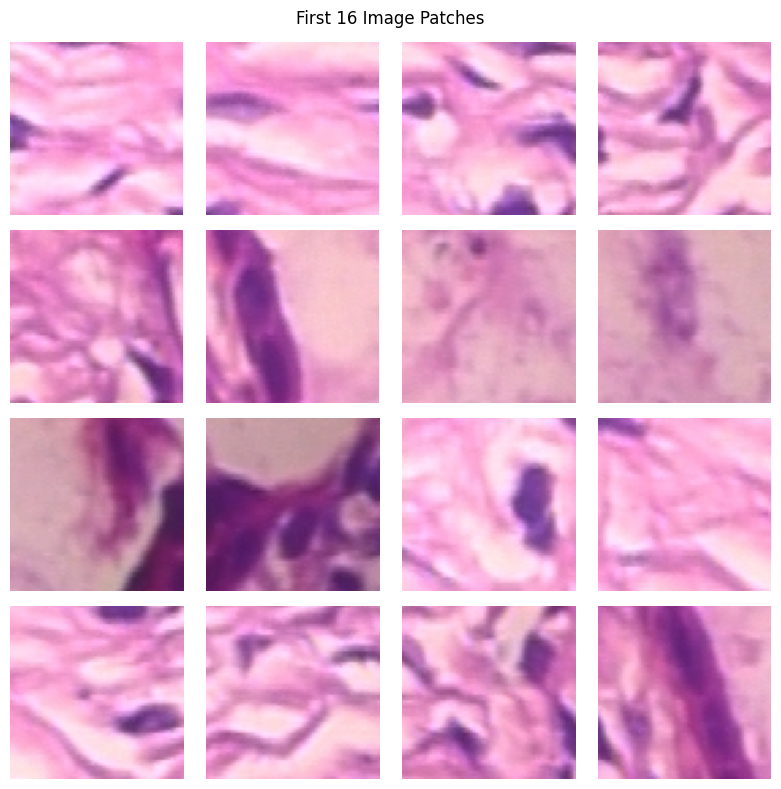

In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for idx, patch in enumerate(patches[:16]):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(patch)
    plt.axis('off')
plt.suptitle("First 16 Image Patches")
plt.tight_layout()
plt.show()

In [88]:
import numpy as np
from PIL import Image
import os

def compute_mean_image(patch_folder):
    patch_files = sorted(os.listdir(patch_folder))
    sum_img = None
    count = 0
    c=1
    for fname in patch_files:
        img = Image.open(os.path.join(patch_folder, fname)).convert('RGB')
        arr = np.array(img).astype(np.float32)

        if sum_img is None:
            sum_img = np.zeros_like(arr)
        
        sum_img += arr
        count += 1
        if(count%70==0):
            print(f'Completed {c} images')
            c=c+1
        

    mean_img = sum_img / count
    return mean_img.astype(np.uint8)  # Optional: use float32 for training


Completed 1 images
Completed 2 images
Completed 3 images
Completed 4 images
Completed 5 images
Completed 6 images
Completed 7 images
Completed 8 images
Completed 9 images
Completed 10 images
Completed 11 images
Completed 12 images
Completed 13 images
Completed 14 images
Completed 15 images
Completed 16 images
Completed 17 images
Completed 18 images
Completed 19 images
Completed 20 images
Completed 21 images
Completed 22 images
Completed 23 images
Completed 24 images
Completed 25 images
Completed 26 images
Completed 27 images
Completed 28 images
Completed 29 images
Completed 30 images
Completed 31 images
Completed 32 images
Completed 33 images
Completed 34 images
Completed 35 images
Completed 36 images
Completed 37 images
Completed 38 images
Completed 39 images
Completed 40 images
Completed 41 images
Completed 42 images
Completed 43 images
Completed 44 images
Completed 45 images
Completed 46 images
Completed 47 images
Completed 48 images
Completed 49 images
Completed 50 images
Completed

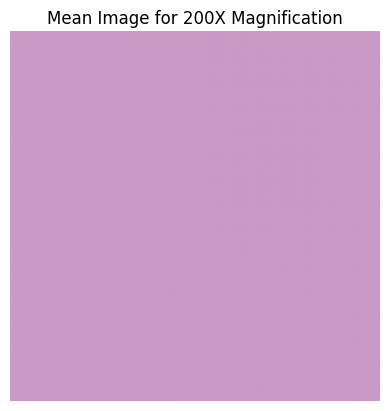

In [90]:
import matplotlib.pyplot as plt
# mean_image_array_mal = compute_mean_image("patch_data/malignant")
# mean_image_mal = Image.fromarray(mean_image_array_mal)

# # Save the mean image
# mean_image_mal.save('mean_image_malignant.png')
# print("saved 1")
mean_image_array_be = compute_mean_image("patch_data/benign")
mean_image_be = Image.fromarray(mean_image_array_be)

# Save the mean image
mean_image_be.save('mean_image_benign.png')
print("saved")
plt.imshow(mean_image_array_mal)
plt.title("Mean Image for 200X Magnification")
plt.axis('off')
plt.show()


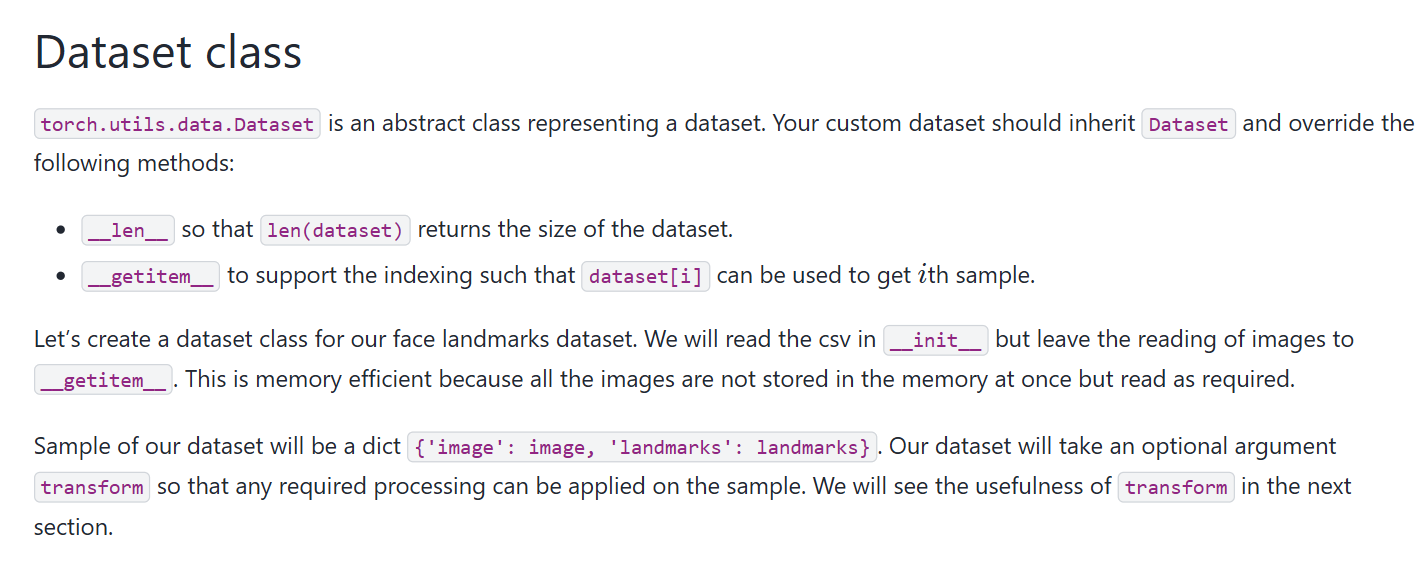

In [1]:
from torch.utils.data import Dataset, DataLoader

In [7]:
from glob import glob
benign=glob('patch_data/benign/*.png')
malignant=glob('patch_data/malignant/*.png')
benign_labels=[0]*len(begign)
malignant_labels = [1] * len(malignant)
all_image_paths = benign + malignant
all_labels = benign_labels + malignant_labels
combined = list(zip(all_image_paths, all_labels))

In [8]:
combined

[('patch_data/benign\\SOB_B_A-14-22549AB-200-001.png_0.png', 0),
 ('patch_data/benign\\SOB_B_A-14-22549AB-200-001.png_1.png', 0),
 ('patch_data/benign\\SOB_B_A-14-22549AB-200-001.png_10.png', 0),
 ('patch_data/benign\\SOB_B_A-14-22549AB-200-001.png_11.png', 0),
 ('patch_data/benign\\SOB_B_A-14-22549AB-200-001.png_12.png', 0),
 ('patch_data/benign\\SOB_B_A-14-22549AB-200-001.png_13.png', 0),
 ('patch_data/benign\\SOB_B_A-14-22549AB-200-001.png_14.png', 0),
 ('patch_data/benign\\SOB_B_A-14-22549AB-200-001.png_15.png', 0),
 ('patch_data/benign\\SOB_B_A-14-22549AB-200-001.png_16.png', 0),
 ('patch_data/benign\\SOB_B_A-14-22549AB-200-001.png_17.png', 0),
 ('patch_data/benign\\SOB_B_A-14-22549AB-200-001.png_18.png', 0),
 ('patch_data/benign\\SOB_B_A-14-22549AB-200-001.png_19.png', 0),
 ('patch_data/benign\\SOB_B_A-14-22549AB-200-001.png_2.png', 0),
 ('patch_data/benign\\SOB_B_A-14-22549AB-200-001.png_20.png', 0),
 ('patch_data/benign\\SOB_B_A-14-22549AB-200-001.png_21.png', 0),
 ('patch_data

In [10]:
import random
random.shuffle(combined)
all_image_paths, all_labels = zip(*combined)

In [13]:
# mean_image = torch.load("mean_200X.pt")  # Shape: [3, 224, 224]
from torchvision import transforms, models
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


In [23]:
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
class PatchDataset200X(Dataset):
    def __init__(self, image_paths, labels, mean_image, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.mean_image = mean_image
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert('RGB')
        
        normalized_img = transforms.ToTensor()(img)- mean_image
        # normalized_resized = F.interpolate(normalized_img.unsqueeze(0), size=self.resize_to, mode='bilinear', align_corners=False).squeeze(0)

        # Resize mean image if needed
        # if self.mean_image.shape != img_tensor.shape:
        #     mean_resized = transforms.Resize(img_tensor.shape[1:])(self.mean_image)
        # else:
        #     mean_resized = self.mean_image

        # normalized_img = img_tensor - mean_resized
        return normalized_img, self.labels[idx]


In [24]:
from PIL import Image
from torchvision import transforms
import torch
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

transform = transforms.ToTensor()

img1 = transform(Image.open('mean_image_benign.png').convert('RGB'))
img2 = transform(Image.open('mean_image_malignant.png').convert('RGB'))

# --- Step 2: Compute mean image ---
mean_image = (img1 + img2) / 2
dataset = PatchDataset200X(all_image_paths, all_labels, mean_image, transform)

# Split into train/test
split = int(0.8 * len(dataset))
train_dataset = torch.utils.data.Subset(dataset, list(range(split)))
test_dataset = torch.utils.data.Subset(dataset, list(range(split, len(dataset))))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [22]:
train_loader

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class HistopathologyCNN(nn.Module):
    def __init__(self, num_classes=2, leaky_relu_slope=0.0):
        super(HistopathologyCNN, self).__init__()

        # Conv1: 3 input channels (RGB), 32 filters, 5x5 kernel, padding=2, stride=1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, stride=1, padding=2)
        nn.init.normal_(self.conv1.weight, mean=0.0, std=0.0001)  # Gaussian init std=0.0001

        # Conv2: 32 input channels, 32 filters
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5, stride=1, padding=2)
        nn.init.normal_(self.conv2.weight, mean=0.0, std=0.01)    # std=0.01

        # Conv3: 32 input channels, 64 filters
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        nn.init.normal_(self.conv3.weight, mean=0.0, std=0.0001)  # std=0.0001

        # Pooling layers
        self.pool_max = nn.MaxPool2d(kernel_size=3, stride=2)
        self.pool_avg = nn.AvgPool2d(kernel_size=3, stride=2)

        # Activation function (LeakyReLU or ReLU)
        if leaky_relu_slope > 0:
            self.relu = nn.LeakyReLU(negative_slope=leaky_relu_slope)
        else:
            self.relu = nn.ReLU()

        # Fully connected layers
        # Need to calculate input size for first FC layer after conv+pool
        # Assuming input size 64x64 as per your patches:
        # After conv1 + maxpool (3x3 stride 2): output size = floor((64 + 2*2 - 5)/1 + 1) = 64 conv1 output, then pool = floor((64 - 3)/2 + 1) = 31
        # Similarly for conv2 + avgpool and conv3 + avgpool, calculate final feature map size:
        # Let's compute stepwise:

        # After conv1: size remains 64x64 (padding=2 keeps size)
        # After pool_max(3x3 stride 2): floor((64-3)/2)+1 = 31

        # After conv2: size remains 31x31
        # After pool_avg(3x3 stride 2): floor((31-3)/2)+1 = 15

        # After conv3: size remains 15x15
        # After pool_avg(3x3 stride 2): floor((15-3)/2)+1 = 7

        # So final feature map size: 64 channels × 7 × 7 = 3136

        self.fc1 = nn.Linear(64 * 7 * 7, 512)  # can adjust 512 as needed
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        # Conv1 + ReLU + MaxPool
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool_max(x)

        # Conv2 + ReLU + AvgPool
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool_avg(x)

        # Conv3 + ReLU + AvgPool
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool_avg(x)

        # Flatten for FC
        x = x.view(x.size(0), -1)

        # FC layers
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)

        # Output (no softmax here since we'll use CrossEntropyLoss which applies softmax)
        return x


In [26]:
device="cuda"
model=HistopathologyCNN()
model = model.to(device)

In [28]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [40]:
for epoch in range(20):
    model.train()
    loss=0
    c=0
    for input, labels in train_loader:
        inputs=input.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss += loss.item()
        if(c%20==0):
            print(f'{c} complete')
        c=c+1
    print(f"Epoch {epoch+1}/2, Loss: {loss/len(train_loader):.4f}")

0 complete
20 complete
40 complete
60 complete
80 complete
100 complete
120 complete
140 complete
160 complete
180 complete
200 complete
220 complete
240 complete
260 complete
280 complete
300 complete
320 complete
340 complete
360 complete
380 complete
400 complete
420 complete
440 complete
460 complete
480 complete
500 complete
520 complete
540 complete
560 complete
580 complete
600 complete
620 complete
640 complete
660 complete
680 complete
700 complete
720 complete
740 complete
760 complete
780 complete
800 complete
820 complete
840 complete
860 complete
880 complete
900 complete
920 complete
940 complete
960 complete
980 complete
1000 complete
1020 complete
1040 complete
1060 complete
1080 complete
1100 complete
1120 complete
1140 complete
1160 complete
1180 complete
1200 complete
1220 complete
1240 complete
1260 complete
1280 complete
1300 complete
1320 complete
1340 complete
1360 complete
1380 complete
1400 complete
1420 complete
1440 complete
1460 complete
1480 complete
1500 c

In [41]:
torch.save(model.state_dict(), 'breast_model_weights_20_epoch.pth')
print("Model weights saved as 'breast_model_weights_20_epoch.pth'")

Model weights saved as 'breast_model_weights_20_epoch.pth'


In [42]:
from sklearn.metrics import accuracy_score

model.eval()  # Set model to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# ✅ Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 95.95%


In [ ]:
def predicting(image_name,model):
    patch_size = (64, 64)  # height x width
    patches = []
    source="main_data/malignant"
    img_count=0
    img = Image.open(os.path.join(source,img_name)).convert("RGB")
    img_array = np.array(img)
# Divide into patches
    count=0
    for i in range(0, img_array.shape[0], patch_size[0]):
        for j in range(0, img_array.shape[1], patch_size[1]):
            patch = img_array[i:i+patch_size[0], j:j+patch_size[1]]
            # Ensure patch is full-sized (optional, skip partials)
            if patch.shape[0] == patch_size[0] and patch.shape[1] == patch_size[1]:
                patch_img = Image.fromarray(patch)
                # patches.append(patch)
                patch_img.save(os.path.join(patch_data, f"{img_name}_{count}.png"))
                count=count+1
    img_count=img_count+1
    if(img_count == 700):
        break
    
    print(f"Total patches in image no. {img_count} and name {img_name} are : {count}")
    